In [10]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('experiment_lesson_4.csv')
df.head(5)

,order_id,delivery_time,district,experiment_group
0,3159,44.0,Purlieus,control
1,10426,51.0,Purlieus,control
2,9155,46.0,Purlieus,control
3,10699,34.0,Purlieus,control
4,10061,43.0,Purlieus,control


In [3]:
df['experiment_group'].value_counts()

test       10104
control    10092
Name: experiment_group, dtype: int64

In [8]:
control = df[df['experiment_group'] == 'control']["delivery_time"]
test = df[df['experiment_group'] == 'test']["delivery_time"]

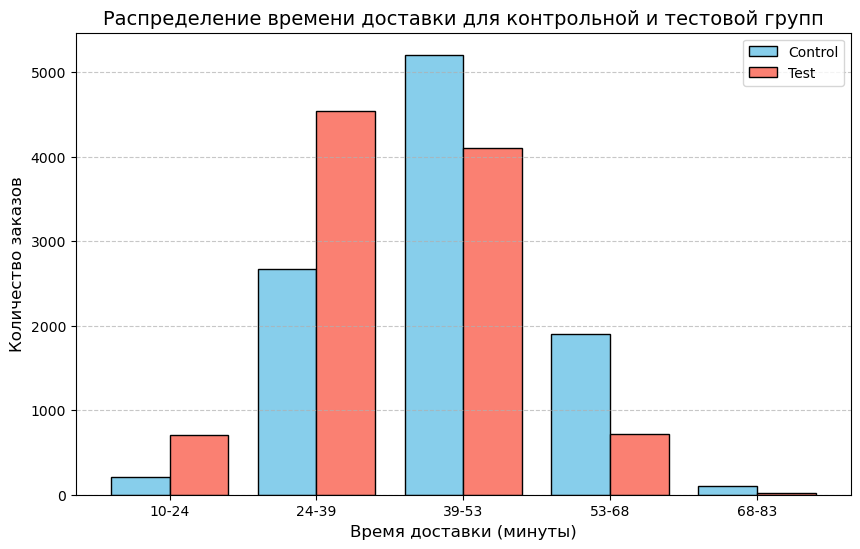

In [11]:
bins = np.histogram_bin_edges(df["delivery_time"], bins=5)  # Определяем одинаковые границы
control_hist, _ = np.histogram(control, bins=bins)
test_hist, _ = np.histogram(test, bins=bins)

# Ширина столбца и сдвиг
bar_width = 0.4
x = np.arange(len(bins) - 1)

# Построение графика
plt.figure(figsize=(10, 6))
plt.bar(x - bar_width / 2, control_hist, width=bar_width, color='skyblue', edgecolor='black', label="Control")
plt.bar(x + bar_width / 2, test_hist, width=bar_width, color='salmon', edgecolor='black', label="Test")

# Настройки графика
plt.xticks(x, [f"{int(bins[i])}-{int(bins[i+1])}" for i in range(len(bins)-1)])
plt.xlabel("Время доставки (минуты)", fontsize=12)
plt.ylabel("Количество заказов", fontsize=12)
plt.title("Распределение времени доставки для контрольной и тестовой групп", fontsize=14)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Показать график
plt.show()

In [16]:
test.value_counts()

36.0    414
40.0    408
41.0    405
38.0    403
35.0    397
       ... 
68.0      4
72.0      4
10.0      3
75.0      2
74.0      1
Name: delivery_time, Length: 65, dtype: int64

In [25]:
from scipy.stats import normaltest

data = control.copy()
clean_data = np.array(data)[~np.isnan(data)]

# Тест Агостино-Пирсона
stat, p_value = normaltest(clean_data)

alpha = 0.05
if p_value > alpha:
    print(f"Контрольная: Данные имеют нормальное распределение (p = {p_value:.3f})")
else:
    print(f"Контрольная: Данные не имеют нормального распределения (p = {p_value:.3f})")
    
    
data = test.copy()
clean_data = np.array(data)[~np.isnan(data)]

# Тест Агостино-Пирсона
stat, p_value = normaltest(clean_data)

alpha = 0.05
if p_value > alpha:
    print(f"Тестовая: Данные имеют нормальное распределение (p = {p_value:.3f})")
else:
    print(f"Тестовая: Данные не имеют нормального распределения (p = {p_value:.3f})")

Контрольная: Данные имеют нормальное распределение (p = 0.881)
Тестовая: Данные не имеют нормального распределения (p = 0.030)


In [28]:
control_group = df[df["experiment_group"] == "test"]["delivery_time"]
std_dev = control_group.std(ddof=1)
std_dev_rounded = round(std_dev, 2)
print(f"{std_dev_rounded}")

9.88


In [34]:
100*(test.mean() - control.mean())/control.mean()

-13.354653121660812

In [32]:
from scipy.stats import ttest_ind
control_group = df[df["experiment_group"] == "control"]["delivery_time"]
test_group = df[df["experiment_group"] == "test"]["delivery_time"]

t_stat, p_value = ttest_ind(control_group, test_group, equal_var=False)

# Округление t-статистики до целого
t_stat_rounded = round(t_stat)
print(f"T-статистика: {t_stat_rounded}")

T-статистика: 43
